Natalie LaLuzerne

For this project, I chose to use data about NFL games. The data contains information on NFL football games including the teams involved in the game, which team was home and which team was away, the score of each team, which team won, etc. 

Visualization and storytelling could help describe this data set and establish additional value in a few differnt ways.
1. By using bar plots, I can examine and visualize win percentages of home and away games of a particular NFL team to see if the team wins more home or away games. The bar plot will be able to clearly show the distribution of win percentages of home and away games, and may even display season-to-season trends like whether a particular coach or quarterback was successful or not.
2. By using box plots, I can determine the median win percentage of home and away games of a particular NFL team in both the regular season and the post season, as well as calculate the 25th and 75th percentiles, the minimum and maximum scores, and determine if there are any outlier scores.
3. By using violin plots, I can calculate the median scores of home and away games of a particular NFL team in the regular and post seasons, as well as calculate the 25th and 75th percentile of scores, and the minimum and maximum scores. The violin plots will also tell us the frequency that each of the scores occur in home and away games.

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Constants

In [2]:
data_path = r'..\Data\nfl_games.csv'

Read in the data set

In [3]:
df = pd.read_csv( data_path )

In [4]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


Let's add a 'result2' column for ease of use later on when we are aggregating away game win percentages.

In [5]:
df[ 'result2' ] = df[ 'result1' ]
df.loc[ df[ 'result1' ] == 1.0, 'result2' ] = 0.0
df.loc[ df[ 'result1' ] == 0.0, 'result2' ] = 1.0

In [6]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,result2
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0,0.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0,0.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0,0.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0,0.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0,0.0


My favorite NFL team is the Green Bay Packers. Let's take a look at The Pack. I'll separate out the regular season and post season games, as well separate the home vs. away games in each of the season types. In this data set, home games are 'team1' and away games are 'team2'.

In [7]:
packers_home = df.loc[ df[ 'team1' ] == 'GB' ]
packers_away = df.loc[ df[ 'team2' ] == 'GB' ]

home = packers_home.loc[ df[ 'playoff' ] == 0 ]
away = packers_away.loc[ df[ 'playoff' ] == 0 ]

home_po = packers_home.loc[ df[ 'playoff' ] == 1 ]
away_po = packers_away.loc[ df[ 'playoff' ] == 1 ]

Display our new data sets

In [8]:
home.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,result2
117,1921-10-23,1921,0,0,GB,MNN,1413.889,1480.468,0.497728,7,6,1.0,0.0
118,1921-10-30,1921,0,0,GB,RII,1420.857,1529.741,0.437180,3,13,0.0,1.0
130,1921-11-06,1921,0,0,GB,ECG,1400.301,1354.267,0.654564,43,6,1.0,0.0
131,1921-11-13,1921,0,0,GB,HAM,1424.224,1409.054,0.613369,14,7,1.0,0.0
167,1922-10-08,1922,0,0,GB,RAC,1446.705,1475.580,0.551802,6,10,0.0,1.0


In [9]:
away.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,result2
136,1921-11-20,1921,0,0,ARI,GB,1499.133,1439.739,0.671741,3,3,0.5,0.5
145,1921-11-27,1921,0,0,CHI,GB,1598.148,1444.976,0.778319,20,0,1.0,0.0
159,1922-10-01,1922,0,0,RII,GB,1538.640,1456.797,0.699579,19,14,1.0,0.0
170,1922-10-15,1922,0,0,ARI,GB,1496.457,1428.647,0.682333,16,3,1.0,0.0
178,1922-10-22,1922,0,0,MIL,GB,1349.001,1412.835,0.501678,0,0,0.5,0.5


In [10]:
home_po.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,result2
1391,1939-12-10,1939,0,1,GB,NYG,1669.419,1651.181,0.617549,27,0,1.0,0.0
3194,1961-12-31,1961,0,1,GB,NYG,1671.503,1655.045,0.615126,37,0,1.0,0.0
3819,1965-12-26,1965,0,1,GB,IND,1648.702,1638.160,0.607032,13,10,1.0,0.0
3820,1966-01-02,1965,0,1,GB,CLE,1659.236,1590.851,0.683050,23,12,1.0,0.0
4164,1967-12-23,1967,0,1,GB,LAR,1664.036,1714.908,0.520321,28,7,1.0,0.0


In [11]:
away_po.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,result2
1223,1936-12-13,1936,0,1,WSH,GB,1514.744,1708.815,0.322350,6,21,0.0,1.0
1335,1938-12-11,1938,0,1,NYG,GB,1610.677,1648.865,0.538509,23,17,1.0,0.0
1503,1941-12-14,1941,0,1,CHI,GB,1746.553,1693.589,0.663528,33,14,1.0,0.0
1653,1944-12-17,1944,0,1,NYG,GB,1641.224,1640.867,0.592962,7,14,0.0,1.0
3037,1960-12-26,1960,0,1,PHI,GB,1600.941,1619.418,0.566555,17,13,1.0,0.0


It will be interesting to see the regular season & post season win percetages of Green Bay at Lambeau Field (home) vs. away games. The Packers are famous for being excellent at home. Let's see if this is true.

Calculate the win ratios

In [12]:
home_win_pct = home[ [ 'season', 'result1' ] ].groupby( [ 'season' ] ).mean()
away_win_pct = away[ [ 'season', 'result2' ] ].groupby( [ 'season' ] ).mean()

home_win_pct_po = home_po[ [ 'season', 'result1' ] ].groupby( [ 'season' ] ).mean()
away_win_pct_po = away_po[ [ 'season', 'result2' ] ].groupby( [ 'season' ] ).mean()

Rename the columns for better data representation

In [13]:
home_win_pct = home_win_pct.rename( columns = { 'result1' : 'win_pct' } )
away_win_pct = away_win_pct.rename( columns = { 'result2' : 'win_pct' } )

home_win_pct_po = home_win_pct_po.rename( columns = { 'result1' : 'win_pct' } )
away_win_pct_po = away_win_pct_po.rename( columns = { 'result2' : 'win_pct' } )

Transform the ratios to percentages

In [14]:
home_win_pct[ 'win_pct' ] = home_win_pct[ 'win_pct' ].apply( lambda x: x * 100 )
away_win_pct[ 'win_pct' ] = away_win_pct[ 'win_pct' ].apply( lambda x: x * 100 )

home_win_pct_po[ 'win_pct' ] = home_win_pct_po[ 'win_pct' ].apply( lambda x: x * 100 )
away_win_pct_po[ 'win_pct' ] = away_win_pct_po[ 'win_pct' ].apply( lambda x: x * 100 )

Plot the Green Bay Packers' regular season win percentages

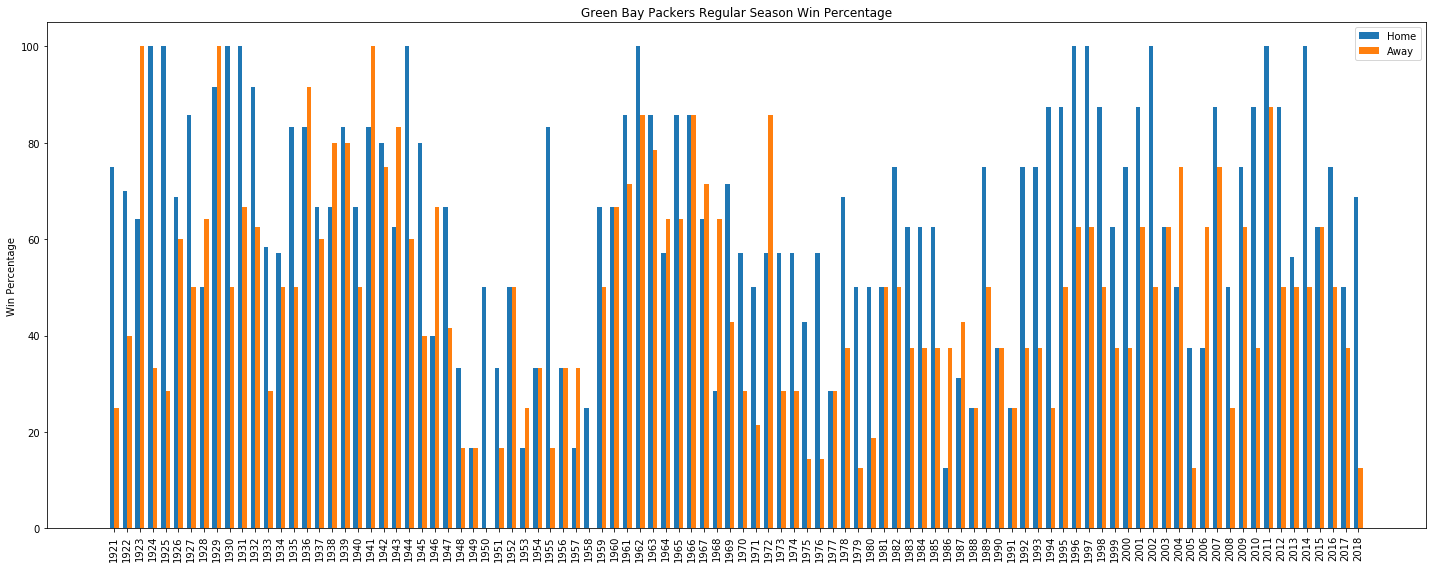

In [15]:
labels = home_win_pct.index.values.tolist()
x = np.arange( len( labels ) )
width = 0.35

fig, ax = plt.subplots( figsize = (20, 8 ) )
rects1 = ax.bar( x - width / 2, home_win_pct[ 'win_pct' ], width, label = 'Home' )
rects2 = ax.bar( x + width / 2, away_win_pct[ 'win_pct' ], width, label = 'Away' )

ax.set_ylabel( 'Win Percentage' )
ax.set_title( 'Green Bay Packers Regular Season Win Percentage' )
ax.set_xticks( x )
ax.set_xticklabels( labels )
ax.legend()

plt.xticks( rotation = 90 )

fig.tight_layout()
plt.show()

What a legacy! The Green Bay Packers have been a team for 98 years (as of 2019). From this bar chart, it does appear that the Packers have a higher win percentage at home than they do away; The blue bars seem to peak higher and more frequently above the orange bars throughout seasons; although I will say that the win percentages of away games are pretty high for the most part too. This was just a qualitative look at the regular season win percentages of the Green Bay Packers at home and away games; later, we'll take a more quantitative approach. But let's look at the bar plot for the Packers' post season win percentages.

Plot the Green Bay Packers' post-season win percentages. Given that not all seasons have a playoff campaign, and not all campaigns have both home and away games, we'll plot these separately.

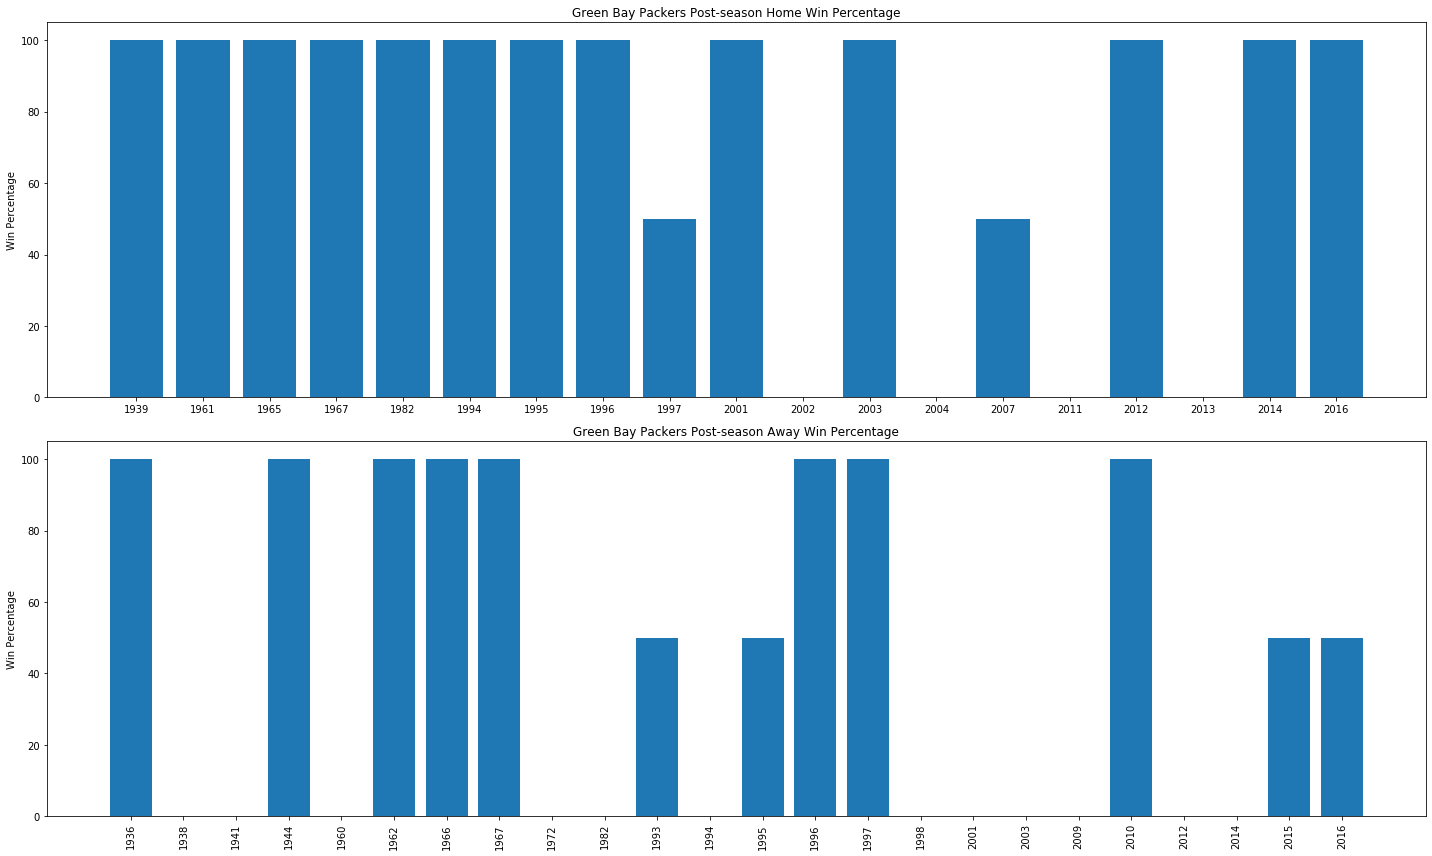

In [16]:
home_labels = home_win_pct_po.index.values.tolist()
home_x = np.arange( len( home_labels ) )

away_labels = away_win_pct_po.index.values.tolist()
away_x = np.arange( len( away_labels ) )

fig, axs = plt.subplots( 2, 1, figsize = ( 20, 12 ) )
rects1 = axs[ 0 ].bar( home_x, home_win_pct_po[ 'win_pct' ] )
rects2 = axs[ 1 ].bar( away_x, away_win_pct_po[ 'win_pct' ] )

axs[ 0 ].set_ylabel( 'Win Percentage' )
axs[ 0 ].set_title( 'Green Bay Packers Post-season Home Win Percentage' )
axs[ 0 ].set_xticks( home_x )
axs[ 0 ].set_xticklabels( home_labels )

axs[ 1 ].set_ylabel( 'Win Percentage' )
axs[ 1 ].set_title( 'Green Bay Packers Post-season Away Win Percentage' )
axs[ 1 ].set_xticks( away_x )
axs[ 1 ].set_xticklabels( away_labels )

plt.xticks( rotation = 90 )

fig.tight_layout()
plt.show()

These bar plots, while not as pretty to look at, show some interesting features. Since NFL teams must earn their spot in the post-season, not every Green Bay season has a post season campaign. Also, since the post-season is sudden-death format, meaning that once you lose a game, you're out, the win percentages are either 100% or they're not. The other thing that I'd like to point out is that during the post season during playoff games, teams do play at home or away, but when they reach the Superbowl, the game is hosted at some predetermined stadium, which is generally neither of the teams' home fields (although it could be). In this case, the teams are still designated as home or away, but that doesn't mean they actually get the home-field advantage we observed above. With this said, the Green Bay Packers won the NFL Championships (pre-SuperBowl era) in 1936, 1939, 1944, 1962, and 1965. After the Superbowl was estabished in 1966, the Green Bay Packers won the Superbowl in 1966, 1967, 1996, and 2010. Looking at these years on the bar plots above, all of these post-seasons had 100% win percentages. There are other seasons with 100% win percentages in either the home games or the away games in which they did not win a championship, and that is because the Green Bay Packers switched from having a home or away game in which they won, to an opposite location game in which they lost. These plots also show that the Green Bay Packers have a better win percentage at home than they do away. The Packers won 100% of their home games in 13/19 post season campaigns while only winning 8/24 away games in the post season.

Now let's take a look at the actual numbers of the home and away games to see if the Packers are quantifiably better at home than they are away. I'll use box and whisker plots to show this.

Add a column with the location of the game to each of the data sets so that we can join the data sets together

In [17]:
home_win_pct[ 'location' ] = 'home'
away_win_pct[ 'location' ] = 'away'

home_win_pct_po[ 'location' ] = 'home'
away_win_pct_po[ 'location' ] = 'away'

Combine the regular season data frames together and the post season data frames together

In [18]:
regular_seasons = [ home_win_pct, away_win_pct ]
post_seasons = [ home_win_pct_po, away_win_pct_po ]

regular_season = pd.concat( regular_seasons )
post_season = pd.concat( post_seasons )

In [19]:
regular_season.head()

,win_pct,location
season,,
1921,75.000000,home
1922,70.000000,home
1923,64.285714,home
1924,100.000000,home
1925,100.000000,home


In [20]:
regular_season.tail()

,win_pct,location
season,,
2014,50.0,away
2015,62.5,away
2016,50.0,away
2017,37.5,away
2018,12.5,away


In [21]:
post_season.head()

,win_pct,location
season,,
1939,100.0,home
1961,100.0,home
1965,100.0,home
1967,100.0,home
1982,100.0,home


In [22]:
post_season.tail()

,win_pct,location
season,,
2010,100.0,away
2012,0.0,away
2014,0.0,away
2015,50.0,away
2016,50.0,away


Create the boxplots of the regular and post season win percentages

Text(0.5, 1.0, 'Regular Season Home vs. Away Win Percentage of the Green Bay Packers')

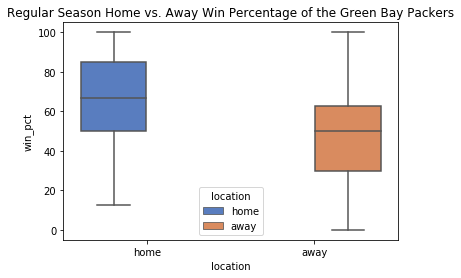

In [23]:
sns.boxplot( y = 'win_pct', x = 'location', data = regular_season, palette = 'muted',
             hue = 'location' ).set_title( 
             "Regular Season Home vs. Away Win Percentage of the Green Bay Packers" )

Sure enough, the Packers are quantifiably better at home than they are away in the regular season. They have about a 10% higher median win percentage at home than they do away in regular season games. The interquartile range for home games is also much higher on the percentage scale than the IQR for away games. It also looks like the 25th percentile for home game win percentages is either at or slightly above the median for away games, which further enforces the Packers' home field advantage. The maximum win percentage is 100% for both home and away, since they can't win more than 100% of the time, and they've gone undefeated in the regular season multiple times. It's nice to see that the Packers have never had a season where they lost every single home game, but it does look like there have been seasons where the Packers have lost every single away game (oof) when looking at the minimum win percentage. From this, you can infer that the Packers have never had a winless season either.

Text(0.5, 1.0, 'Post Season Home vs. Away Win Percentage of the Green Bay Packers')

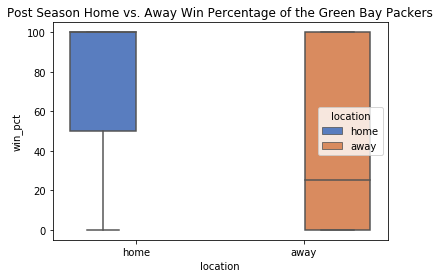

In [24]:
sns.boxplot( y = 'win_pct', x = 'location', data = post_season, palette = 'muted',
             hue = 'location' ).set_title( 
             "Post Season Home vs. Away Win Percentage of the Green Bay Packers" )

These box plots look a little funny. This stems from the fact that as a mentioned earlier, the post season structure is sudden death, so you either win all of them, or you're out after your first loss. The best thing to take away from this plot is that the Packers are still better at home in the post season than they are at away games. This is evidenced by the IQR for home games being above 50% and the IQR for away games spanning from 0-100% - meaning that the majority of home post-season games are distributed above a 50% win percentage, while away post season win percentages are distributed fairly evenly from 0-100%.

Lastly, let's look at the actual scores of the Green Bay Packers in the regular and post seasons. Theoretically, I would expect that they would score more points at home than they would away since they win more frequently at home, but let's test this hypothesis. We'll use a Violin Plot. Not only will the violin plots show us what the median score of home and away games are in the regular and post seasons, but it will also show us the most common scores of Packers games.

Get the scores of the games

In [25]:
home_scores = home[ [ 'season', 'score1' ] ]
away_scores = away[ [ 'season', 'score2' ] ]

home_scores_po = home_po[ [ 'season', 'score1' ] ]
away_scores_po = away_po[ [ 'season', 'score2' ] ]

Rename the score1 and score2 columns to score

In [26]:
home_scores = home_scores.rename( columns = { 'score1' : 'score' } )
away_scores = away_scores.rename( columns = { 'score2' : 'score' } )

home_scores_po = home_scores_po.rename( columns = { 'score1' : 'score' } )
away_scores_po = away_scores_po.rename( columns = { 'score2' : 'score' } )

Add a column with the location of the game to each of the data sets so that we can join the data sets together

In [27]:
home_scores[ 'location' ] = 'home'
away_scores[ 'location' ] = 'away'

home_scores_po[ 'location' ] = 'home'
away_scores_po[ 'location' ] = 'away'

In [28]:
home_scores.head()

,season,score,location
117,1921,7,home
118,1921,3,home
130,1921,43,home
131,1921,14,home
167,1922,6,home


In [29]:
away_scores.head()

,season,score,location
136,1921,3,away
145,1921,0,away
159,1922,14,away
170,1922,3,away
178,1922,0,away


In [30]:
home_scores_po.head()

,season,score,location
1391,1939,27,home
3194,1961,37,home
3819,1965,13,home
3820,1965,23,home
4164,1967,28,home


In [31]:
away_scores_po.head()

,season,score,location
1223,1936,21,away
1335,1938,17,away
1503,1941,14,away
1653,1944,14,away
3037,1960,13,away


Combine the regular season data frames together and combine the post season data frames together

In [32]:
regular_seasons_scores = [ home_scores, away_scores ]
post_seasons_scores = [ home_scores_po, away_scores_po ]

regular_season_scores = pd.concat( regular_seasons_scores )
post_season_scores = pd.concat( post_seasons_scores )

In [33]:
regular_season_scores.head()

,season,score,location
117,1921,7,home
118,1921,3,home
130,1921,43,home
131,1921,14,home
167,1922,6,home


In [34]:
regular_season_scores.tail()

,season,score,location
16139,2018,17,away
16155,2018,24,away
16181,2018,17,away
16219,2018,17,away
16235,2018,44,away


In [35]:
post_season_scores.head()

,season,score,location
1391,1939,27,home
3194,1961,37,home
3819,1965,13,home
3820,1965,23,home
4164,1967,28,home


In [36]:
post_season_scores.tail()

,season,score,location
15204,2014,22,away
15465,2015,35,away
15467,2015,20,away
15735,2016,34,away
15737,2016,21,away


Create the violin plots for the regular and post season scores

Text(0.5, 1.0, 'Regular Season Home vs. Away Scores of the Green Bay Packers')

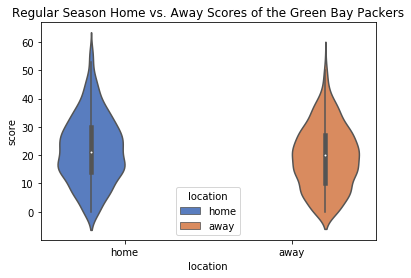

In [37]:
sns.violinplot( y = 'score', x = 'location', data = regular_season_scores, palette = 'muted',
             hue = 'location' ).set_title( 
             "Regular Season Home vs. Away Scores of the Green Bay Packers" )

Interestingly enough, there doesn't seem to be much difference between scores of the Green Bay Packers in home and away games in the regular season. The median score for both home and away games appears to be almost exactly the same. However, it does look like the IQR for regular season home game scores is slightly higher than the IQR for away game scores, and also that the highest density of scores for home games is skewed slightly higher for home games than away games, as the violin for away gamess has a wider bottom than the violin for home games. The maximum score for home games is also slightly higher than the maximum score for away games. None of theses differences really appear to be statistically significant though.

Text(0.5, 1.0, 'Post Season Home vs. Away Scores of the Green Bay Packers')

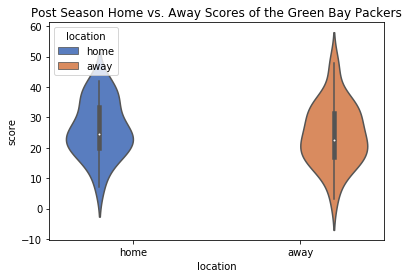

In [38]:
sns.violinplot( y = 'score', x = 'location', data = post_season_scores, palette = 'muted',
             hue = 'location' ).set_title( 
             "Post Season Home vs. Away Scores of the Green Bay Packers" )

The violin plot for the Green Bay Packers' post season scores also doesn't show much difference between scores of home and away games. The median scores of home and away games appears to be only slightly different, and the same statement holds true for the IQR of both home and away games in the post-season. The maximum score for away post season games is actually higher than the maximum score for home post season games, but it does appear that home games had a slight skew towards higher scores in the post season, as evidenced by the wider top of the blue violin.

In conclusion, the Green Bay Packers are better at home games than they are at away games in both the regular season and post season.